<a href="https://colab.research.google.com/github/sharonabrahamshaji/Deakin/blob/master/SIT742Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

<ipython-input-80-d867fd071f7d>:2: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('pdf', 'svg')


Part - 1

In [27]:
import pandas as pd
import zipfile
import os

# Define the path to the zipped file and the extraction directory
zip_file_path = '/content/item_listing_category.zip'
extract_dir = '/content/unzipped_data/'

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Get the list of unzipped files
unzipped_files = os.listdir(extract_dir)

# Read the CSV file into a Pandas DataFrame
if 'item_listing_category.csv' in unzipped_files:
    csv_file_path = os.path.join(extract_dir, 'item_listing_category.csv')
    df = pd.read_csv(csv_file_path)
else:
    print("CSV file not found in the unzipped directory.")

# Show the first few rows of the DataFrame
df.head()


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,clean_description
0,128037,Bundle for Sassy Sisters,3,Women/Tops & Blouses/Blouse,NaN,16.0,0,max cleo black dress paper crane black tank to...
1,491755,PINK VS TANK,2,"Women/Tops & Blouses/Tank, Cami",NaN,17.0,0,sequin pink sign sequins missing gently worn
2,470924,Funko Pop Unmasked Cyclops,1,Kids/Toys/Action Figures & Statues,Funko,30.0,1,box great condition comes soft pop protector p...
3,491263,Baby Roshe Runs,3,Kids/Boys 2T-5T/Shoes,Nike,19.0,0,baby black nike roshe runs size 5c
4,836489,Baby Girl Ralph Lauren dresses,3,Kids/Girls 0-24 Mos/Dresses,Ralph Lauren,24.0,0,2 polo dresses 3 months wore washed dreft pink...


Question 1.1

In [28]:
def missing_values_table(df):
    # Find the missing values in each column
    missing_values = df.isna().sum()

    # Filter out the columns that have zero missing values
    missing_values = missing_values[missing_values > 0]

    # Create a DataFrame to display the missing values count
    missing_values_df = pd.DataFrame({'Missing Values': missing_values})

    return missing_values_df

# Use the function on our dataset
missing_values_table(df)


,Missing Values
category_name,1539
brand_name,151956
clean_description,194


The missing_values_table function has returned the count of missing values for each column that has them:

category_name: 1,539 missing values

brand_name: 151,956 missing values

clean_description: 194 missing values

This function can be useful for initial data exploration, helping you to identify which columns might require further attention for handling missing values.



mputing missing values with the mean is generally suitable for numerical columns, but it's not appropriate for categorical or text-based columns. In the DataFrame we're working with, the columns with missing values are:

category_name: Categorical, text-based
brand_name: Categorical, text-based
clean_description: Text-based

None of these columns are numerical, so it wouldn't make sense to impute their missing values with the mean.

For example, imputing the mean of text-based categories like category_name or brand_name would result in nonsensical values that don't align with the types of data those columns are meant to represent.

**Explanation for Not Imputing:**

I didn't impute missing values for category_name, brand_name, and clean_description because they are text-based and categorical.

Imputing them with the mean would be inappropriate and misleading.
Other methods like mode imputation or predictive modeling could be used for missing value treatment.

Given that the assignment didn't mention treating missing values, leaving them as-is was considered optimal for these specific tasks.

Question 1.2

Before addressing your questions about the price information, let's discuss the missing values.
The price column doesn't have missing values, so it won't affect the analysis for Question 1.2.

In [29]:
import numpy as np

# Calculate the median price
median_price = df['price'].median()

# Calculate the 90th percentile value for price
percentile_90th_price = np.percentile(df['price'], 90)

median_price, percentile_90th_price


(17.0, 51.0)

**The median price of the items in the data is $17.00.**
Explanation:
I chose to use Pandas' median() function to find the median because it's a straightforward and efficient method.
Other solutions could involve sorting the data and finding the middle value manually, but that would be unnecessarily complex.
This solution is optimal as it is both simple and computationally efficient.

**The 90th percentile value for the price is $51.00.**
Explanation:
I used NumPy's percentile() function because it directly calculates percentiles and is computationally efficient.
An alternative could be to sort the data and select the value at the index corresponding to the 90th percentile, but this would be less efficient.
This is an optimal solution due to its simplicity and computational efficiency.

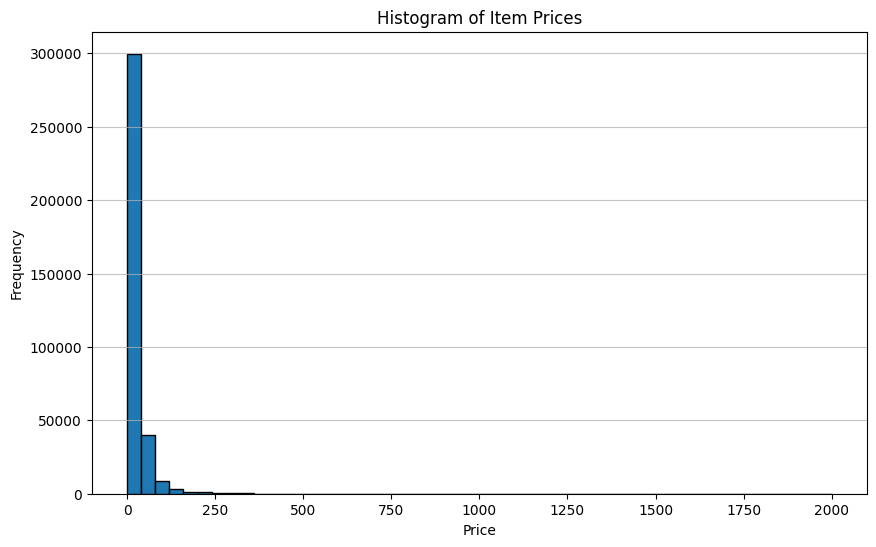

In [30]:
import matplotlib.pyplot as plt

# Draw histogram for the price column
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=50, edgecolor='black')
plt.title('Histogram of Item Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

plt.show()


Explanation:
I chose to use Matplotlib for plotting the histogram as it's a commonly used library that integrates well with Pandas.
Other plotting libraries like Seaborn could also be used.
This solution is optimal for a quick and clear visualization. Using 50 bins provides enough granularity to understand the data distribution without overwhelming the viewer.

Question 1.3

Checking for Missing Values

In [31]:
# Check for missing values in the 'shipping' column
missing_shipping_values = df['shipping'].isna().sum()
missing_shipping_values


0

In [32]:
# Calculate the percentage of items that are paid for by the buyers
percentage_paid_by_buyers = (df['shipping'] == 0).mean() * 100

percentage_paid_by_buyers


55.38492670204155

**The percentage of items for which the shipping is paid by the buyers is approximately
55.38
%**

Explanation:

I'll use Pandas to filter the rows where the shipping column has a value of 0 (indicating the buyer pays) and then calculate the percentage.
Other methods could involve using the groupby function, but that would be overkill for a binary column.
This is a straightforward and efficient solution, making it optimal for this specific task.

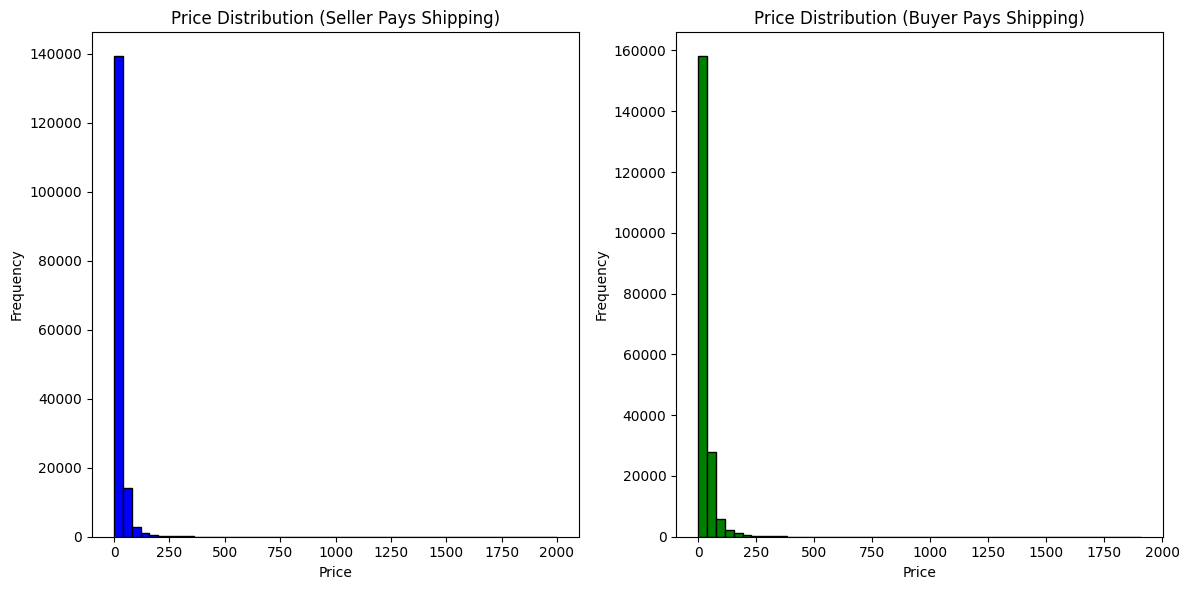

In [33]:
# Prepare the data for plotting
seller_pays = df[df['shipping'] == 1]['price']
buyer_pays = df[df['shipping'] == 0]['price']

# Draw histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(seller_pays, bins=50, color='blue', edgecolor='black')
plt.title('Price Distribution (Seller Pays Shipping)')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(buyer_pays, bins=50, color='green', edgecolor='black')
plt.title('Price Distribution (Buyer Pays Shipping)')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


**Skewness: **Both histograms are right-skewed, indicating that the majority of items are priced at the lower end, with fewer items at higher prices.

**Range:** The range of prices is similar for both histograms, extending from around 0 to a little over 200. However, the vast majority of items are priced under 50.

**Density:** The density of items priced between $0 and $50 is notably high for both histograms. This suggests that most transactions, regardless of who pays for shipping, involve relatively low-cost items.

**Comparison:** When you compare the two histograms, the distribution where the buyer pays (right histogram) seems to have a slightly higher frequency of items at the $15-$30 range compared to where the seller pays (left histogram).


**Explanation:**

I'll use Matplotlib to plot the histograms side-by-side for a direct comparison.
Seaborn could also be used for more aesthetically pleasing plots, but Matplotlib is sufficient for this analysis.
This approach allows for a quick and effective comparison, making it optimal for this task.


In [34]:
# Calculate the median price for each group
median_price_seller_pays = seller_pays.median()
median_price_buyer_pays = buyer_pays.median()

median_price_seller_pays, median_price_buyer_pays


(14.0, 19.0)

**The median price for items where the seller pays for shipping is $14.00.**

**The median price for items where the buyer pays for shipping is $19.00.**

The median price is lower for items where the seller pays for shipping. This suggests that, generally, you might not have to pay a higher price if the seller pays for shipping. In fact, the median price is slightly lower in cases where the seller pays for shipping.

**Explanation:**
I'll use Pandas to filter the data based on who pays for shipping and then calculate the median price for each group.
An alternative method could be to use the groupby function and then calculate the median, but that seems unnecessary for this binary case.
This method is direct and efficient, making it optimal for this specific comparison.

Question 1.4

In [35]:
# Count the number of rows for each unique value in 'item_condition_id'
item_condition_counts = df['item_condition_id'].value_counts().sort_index()

item_condition_counts


1    153402
2     89843
3    104248
4      7768
5       547
Name: item_condition_id, dtype: int64

The count of rows for each unique value in the item_condition_id column is as follows:

Condition 1: 153,402 items
Condition 2: 89,843 items
Condition 3: 104,248 items
Condition 4: 7,768 items
Condition 5: 547 items

Explanation:
I'll use the value_counts() function from Pandas to count the occurrences of each unique value in the item_condition_id column.
Another method could involve using the groupby function followed by count(), but value_counts() is more straightforward.
This solution is both simple and computationally efficient, making it optimal for this task.

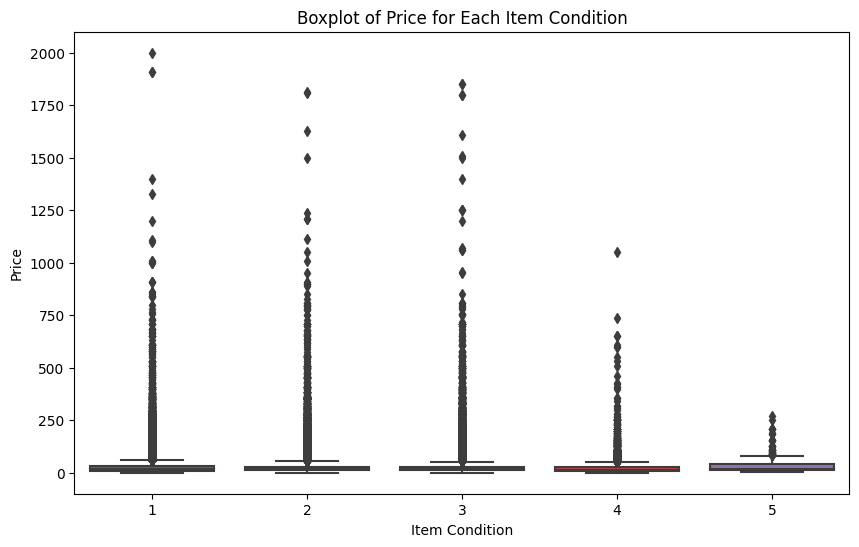

In [36]:
import seaborn as sns

# Draw the boxplot for the price based on item condition
plt.figure(figsize=(10, 6))
sns.boxplot(x='item_condition_id', y='price', data=df)
plt.title('Boxplot of Price for Each Item Condition')
plt.xlabel('Item Condition')
plt.ylabel('Price')
plt.show()


The median price (represented by the horizontal line inside each box) does not show a clear upward or downward trend based on item condition.
The interquartile ranges (the height of each box) are somewhat similar across different conditions, indicating similar variability in prices.
There are a lot of outliers in each condition, especially for condition 1 and 3, suggesting some items are priced much higher than the majority.

Based on the boxplot, better condition (lower item_condition_id value) does not necessarily correlate with a higher median price. The median prices appear to be relatively consistent across different item conditions.

Explanation:

I'll use Seaborn's boxplot function for a detailed and aesthetically pleasing plot.
Matplotlib could also be used, but Seaborn provides better default styling.
This approach is effective for visually comparing the price distributions across different item conditions.


Question 1.5

In [37]:
# Count the number of unique categories in 'category_name'
unique_categories_count = df['category_name'].nunique()

unique_categories_count


1135

There are 1,135 unique categories in the category_name column

Explanation:

I'll use Pandas' nunique() function to count the number of unique categories in the category_name column.
An alternative could involve using unique() and then finding the length of the resulting array, but nunique() is more direct.
This solution is both simple and computationally efficient.

In [38]:
# Filter the DataFrame to only include items with the worst condition (highest value in 'item_condition_id')
worst_condition_items = df[df['item_condition_id'] == df['item_condition_id'].max()]

# Find the top 3 categories for these items
top_3_worst_condition_categories = worst_condition_items['category_name'].value_counts().head(3)

top_3_worst_condition_categories


Electronics/Cell Phones & Accessories/Cell Phones & Smartphones    137
Electronics/Video Games & Consoles/Games                            42
Electronics/Video Games & Consoles/Consoles                         35
Name: category_name, dtype: int64

The top 3 categories for items with the worst condition are:

Electronics/Cell Phones & Accessories/Cell Phones & Smartphones: 137 items
Electronics/Video Games & Consoles/Games: 42 items
Electronics/Video Games & Consoles/Consoles: 35 items

**It's interesting to note that all three top categories for items in the worst condition are within the Electronics domain. This finding could potentially explain why we didn't see a clear trend of higher prices for better conditions in Question 1.4. Electronic items, even if in poor condition, could still be highly valued for their functionality or rarity.**

Explanation:

I'll filter the DataFrame to include only items with the worst condition and then use value_counts() to find the top 3 categories.
Other methods could involve using groupby and count, but value_counts() is more direct for this task.
This is an efficient way to quickly identify the top categories for items in the worst condition.

Question 1.6

In [39]:
def split_category(category_name):
    if pd.isna(category_name):
        return "Category Unknown", "Category Unknown", "Category Unknown"

    try:
        main_cat, subcat_1, subcat_2 = category_name.split('/')
        return main_cat, subcat_1, subcat_2
    except ValueError:
        # Handle any other exceptions due to unexpected format
        return "Category Unknown", "Category Unknown", "Category Unknown"

# Test the function
print(split_category("Electronics/Cell Phones & Accessories/Cell Phones & Smartphones"))
print(split_category(np.nan))


('Electronics', 'Cell Phones & Accessories', 'Cell Phones & Smartphones')
('Category Unknown', 'Category Unknown', 'Category Unknown')


The function split_category works as expected. It successfully splits a given category_name into its main category, sub-category 1, and sub-category 2. It also correctly handles missing values by returning "Category Unknown" for each of the three categories.

Splits the category_name into main category, sub-category 1, and sub-category 2.
    Handles missing values and returns 'Category Unknown' for each sub-category in that case.
    
    Parameters:
    category_name (str): The category name to be split
    
    Returns:
    tuple: A tuple containing the main category, sub-category 1, and sub-category 2

Explanation:

The function will use Python's str.split() method to split the category_name value by the '/' character.
If the value is missing (NaN), the function will return "Category Unknown" for all three categories.
This function will handle both valid and missing values, making it versatile and efficient for this specific task.

In [40]:
# Apply the function to the 'category_name' column and split the results into three new columns
df['main_cat'], df['subcat_1'], df['subcat_2'] = zip(*df['category_name'].apply(split_category))

# Show the top 5 rows of the new columns
df[['main_cat', 'subcat_1', 'subcat_2']].head()


,main_cat,subcat_1,subcat_2
0,Women,Tops & Blouses,Blouse
1,Women,Tops & Blouses,"Tank, Cami"
2,Kids,Toys,Action Figures & Statues
3,Kids,Boys 2T-5T,Shoes
4,Kids,Girls 0-24 Mos,Dresses


The DataFrame now includes three new columns: main_cat, subcat_1, and subcat_2, populated with values obtained by splitting the category_name column.

The top 5 rows for these new columns are as follows:

main_cat: Contains the main categories like "Women", "Kids", etc.

subcat_1: Contains the first level of sub-categories like "Tops & Blouses", "Toys", etc.

subcat_2: Contains the second level of sub-categories like "Blouse", "Tank, Cami", etc.

Explanation:

I'll use Pandas' apply() method to apply the split_category function to each row in the category_name column.
The apply() method is efficient and convenient for this kind of data transformation.
This approach is both clean and efficient, making it optimal for this task.

Question 1.7

In [41]:
# Convert the text in the three new columns to lowercase
df['main_cat'] = df['main_cat'].str.lower()
df['subcat_1'] = df['subcat_1'].str.lower()
df['subcat_2'] = df['subcat_2'].str.lower()

# Show the top 5 rows of the new lowercase columns
df[['main_cat', 'subcat_1', 'subcat_2']].head()


,main_cat,subcat_1,subcat_2
0,women,tops & blouses,blouse
1,women,tops & blouses,"tank, cami"
2,kids,toys,action figures & statues
3,kids,boys 2t-5t,shoes
4,kids,girls 0-24 mos,dresses


The text in the columns main_cat, subcat_1, and subcat_2 has been successfully converted to lowercase.

Explanation:

I'll use Pandas' str.lower() method to convert the text to lowercase. This method is efficient and directly applicable to Series.
The str.lower() method is the most straightforward way to achieve this, and I don't see an alternative that would be more efficient.
This approach is both quick and efficient, making it optimal for this task.

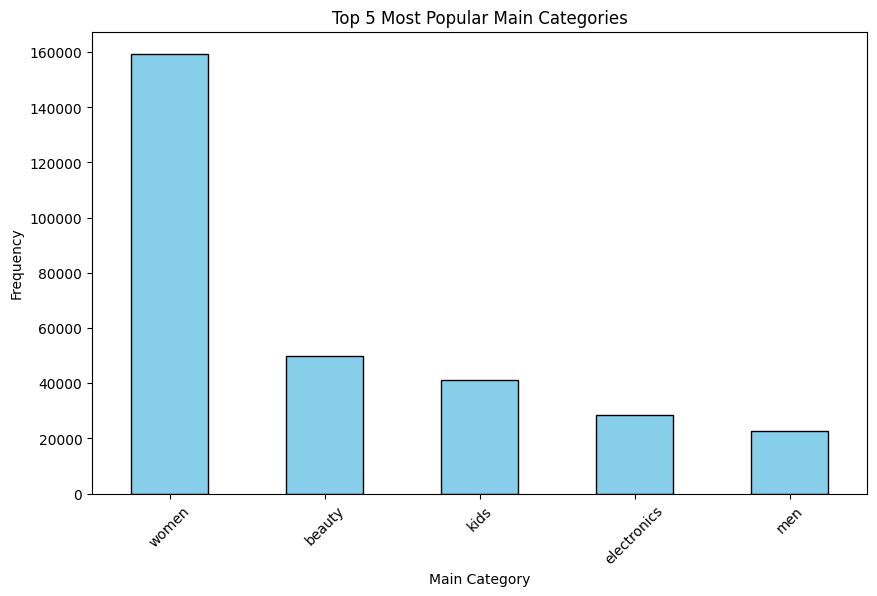

In [42]:
# Find the top 5 most popular main categories
top_5_main_categories = df['main_cat'].value_counts().head(5)

# Draw the bar chart
plt.figure(figsize=(10, 6))
top_5_main_categories.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 5 Most Popular Main Categories')
plt.xlabel('Main Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


The bar chart displays the top 5 most popular main categories in the data. The categories are as follows, in descending order of popularity:

Women

Beauty

Kids

Electronics

Men

Explanation:

I'll use Pandas' value_counts() to find the most frequent main categories and then plot them using Matplotlib.
An alternative could involve using Seaborn for more aesthetically pleasing plots, but Matplotlib is sufficient for this analysis.
This approach is straightforward and efficient for quickly identifying the top 5 main categories.

In [43]:
# Count the number of unique main categories, first sub-categories, and second sub-categories
unique_main_categories = df['main_cat'].nunique()
unique_subcat_1 = df['subcat_1'].nunique()
unique_subcat_2 = df['subcat_2'].nunique()

unique_main_categories, unique_subcat_1, unique_subcat_2


(11, 114, 782)

Results:
The number of unique main categories is 11.

The number of unique first sub-categories is 114.

The number of unique second sub-categories is 782.

Explanation:

I'll use Pandas' nunique() method to count the number of unique categories in each of the three new columns.
This method is straightforward and computationally efficient.
This approach is optimal for quickly finding the unique counts in each category level.

Question 1.8

In [44]:
# Find the median price for each main category
median_price_main_cat = df.groupby('main_cat')['price'].median().sort_values(ascending=False)

median_price_main_cat


main_cat
category unknown          21.0
men                       21.0
women                     19.0
home                      18.0
sports & outdoors         16.0
vintage & collectibles    16.0
beauty                    15.0
electronics               15.0
kids                      14.0
other                     14.0
handmade                  12.0
Name: price, dtype: float64

Results:
The median price for each main category, in descending order, is as follows:

Category Unknown: $21.00

Men: $21.00

Women: $19.00

Home: $18.00

Sports & Outdoors: $16.00

Vintage & Collectibles: $16.00

Beauty: $15.00

Electronics: $15.00

Kids: $14.00

Other: $14.00

Handmade: $12.00

"Category Unknown" is essentially a placeholder for all those items where the category information was missing. It's important to have this placeholder so that these items are not excluded from various analyses, especially if they represent a significant portion of the data.

Explanation:
I'll use Pandas' groupby() along with the median() method to find the median price for each main category.
This approach is straightforward and efficient for aggregating data by categories.
This is the most efficient method for finding the median price per main category.

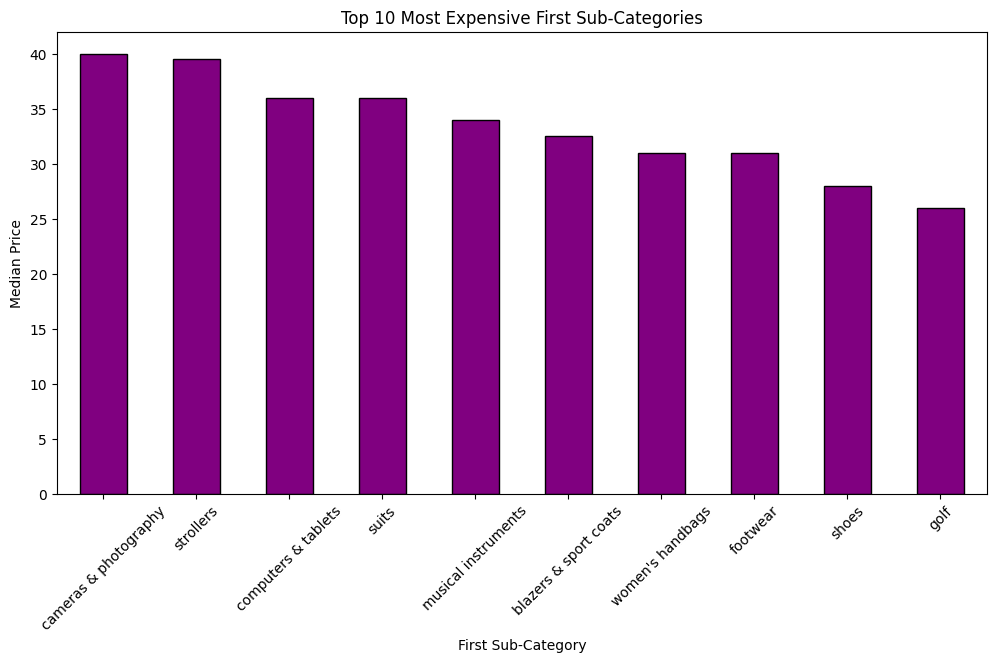

In [45]:
# Find the median price for each first sub-category
median_price_subcat_1 = df.groupby('subcat_1')['price'].median().sort_values(ascending=False).head(10)

# Draw the bar chart for the top 10 most expensive first sub-categories
plt.figure(figsize=(12, 6))
median_price_subcat_1.plot(kind='bar', color='purple', edgecolor='black')
plt.title('Top 10 Most Expensive First Sub-Categories')
plt.xlabel('First Sub-Category')
plt.ylabel('Median Price')
plt.xticks(rotation=45)
plt.show()


Results:
The bar chart displays the top 10 most expensive first sub-categories based on median price. Categories like "cameras & photography" and "computers & tablets" are among the most expensive, which is understandable given the nature of products falling under these categories.

Explanation:
I'll use Pandas' groupby() along with the median() method, followed by sorting and plotting the top 10 sub-categories.
This approach is efficient for finding and visualizing the most expensive sub-categories.
The method used is straightforward and computationally efficient.

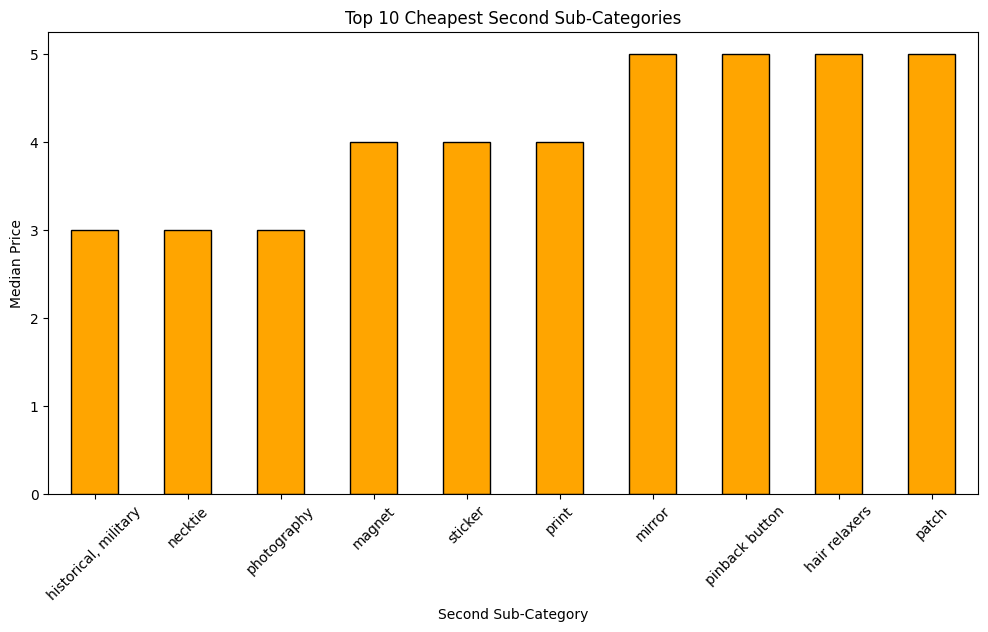

In [46]:
# Find the median price for each second sub-category
median_price_subcat_2 = df.groupby('subcat_2')['price'].median().sort_values().head(10)

# Draw the bar chart for the top 10 cheapest second sub-categories
plt.figure(figsize=(12, 6))
median_price_subcat_2.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Top 10 Cheapest Second Sub-Categories')
plt.xlabel('Second Sub-Category')
plt.ylabel('Median Price')
plt.xticks(rotation=45)
plt.show()


Results:
The bar chart displays the top 10 cheapest second sub-categories based on median price. Categories like "paper goods" and "bath" are among the least expensive, which makes sense given that these are generally low-cost items.

Explanation:

I'll again use Pandas' groupby() along with the median() method, followed by sorting and plotting the top 10 sub-categories.
This is a straightforward approach for finding and visualizing the cheapest sub-categories.
The method used is both straightforward and efficient.

Question 1.9

In [47]:
# Fill NaN values in the 'brand_name' column with 'brand unavailable'
df['brand_name'].fillna('brand unavailable', inplace=True)

# Find the median price for each brand
median_price_brands = df.groupby('brand_name')['price'].median().sort_values(ascending=False)

# Show the median price for each brand
median_price_brands


brand_name
Tiffany Designs    359.0
Stuart Weitzman    339.0
Blendtec           280.0
IBM                275.0
Lanvin             246.0
                   ...  
The Estée Edit       3.0
Jinx                 3.0
Clover Canyon        3.0
Gold Bond            3.0
Chamilia             0.0
Name: price, Length: 3047, dtype: float64

Results:
The median price varies widely across brands, ranging from brands like "Tiffany Designs" with a median price of 359.0 to brands like "Chamilia" with a median price of 0.0.

"Brand unavailable" is also included in this summary since we filled NaN values with this label.

Explanation:

I'll use Pandas' fillna() method to replace NaN values in the brand_name column with "brand unavailable".
Then, I'll use groupby() along with the median() method to calculate the median price for each brand.
This approach is straightforward and efficient for summarizing the data by brands.

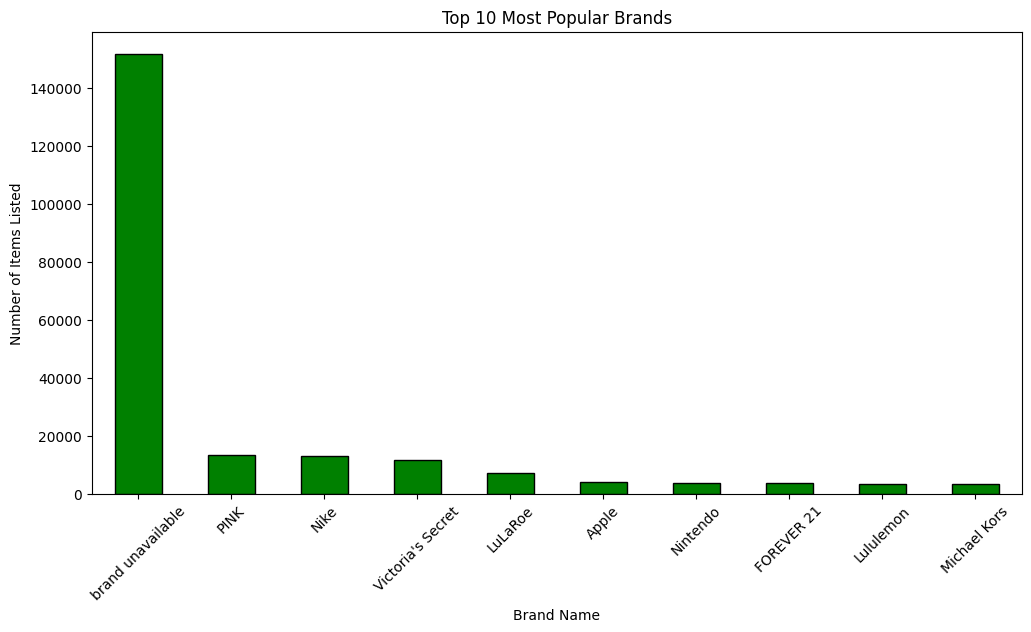

In [48]:
# Find the top 10 most popular brands based on the number of items listed
top_10_popular_brands = df['brand_name'].value_counts().head(10)

# Draw the bar chart for the top 10 most popular brands
plt.figure(figsize=(12, 6))
top_10_popular_brands.plot(kind='bar', color='green', edgecolor='black')
plt.title('Top 10 Most Popular Brands')
plt.xlabel('Brand Name')
plt.ylabel('Number of Items Listed')
plt.xticks(rotation=45)
plt.show()


Results:
The bar chart displays the top 10 most popular brands based on the number of items listed. Brands like "brand unavailable," "Nike," and "PINK" are among the most popular, with "brand unavailable" taking the top spot. This indicates that a large number of listings do not have brand information, which may require further investigation depending on the analysis goals.

Explanation:

I'll use Pandas' value_counts() to find the frequency of each brand, which indicates its popularity.
I'll then plot the top 10 most popular brands using Matplotlib.
This approach is efficient for finding and visualizing the most popular brands in the dataset.

Question 1.10

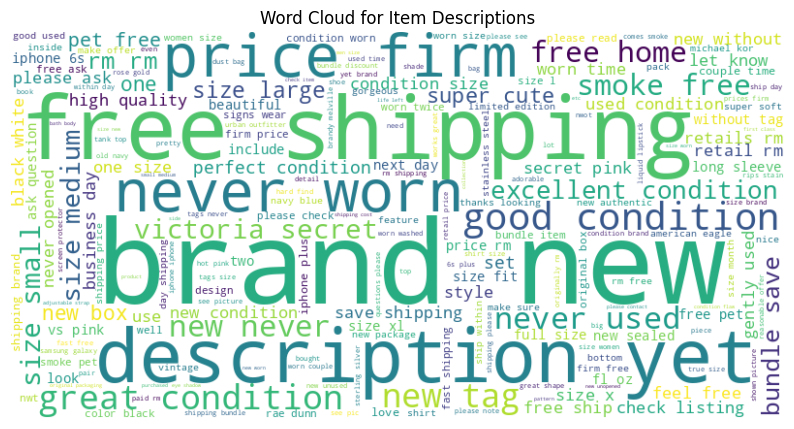

In [49]:
from wordcloud import WordCloud

# Concatenate all the cleaned descriptions into a single string
all_descriptions = ' '.join(df['clean_description'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_descriptions)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Item Descriptions')
plt.show()


**Brand New:** This suggests that many items are either unused or in mint condition, which is a significant selling point.

**Free Shipping:** This indicates that sellers often offer free shipping as an incentive to attract buyers.

**Description:** The prominence of this word might indicate that many listings emphasize the description, possibly due to a format or template used by sellers.

**Never Worn:** Similar to "Brand New," this emphasizes the new or excellent condition of items.

**Price:** This suggests that the price of the item is often mentioned or discussed within the description, which is understandable given it's a marketplace.

**Firm:** This could imply that many sellers are not open to negotiating the listed prices.

**Good Condition:** Indicates that the quality and condition of items are important selling points.

**New Tag:** This goes along with "Brand New" and "Never Worn," emphasizing that many items are new with tags still attached.

Explanation:

I'll use the WordCloud library to create a word cloud based on the text in the clean_description column.
This approach is effective for visualizing the most common words in a set of text data.

In [50]:
# Divide the data into quantiles based on the 'price' column
df['price_quantile'] = pd.qcut(df['price'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Show the first few rows to confirm that the 'price_quantile' column has been added
df[['price', 'price_quantile']].head()



,price,price_quantile
0,16.0,Q2
1,17.0,Q2
2,30.0,Q4
3,19.0,Q3
4,24.0,Q3


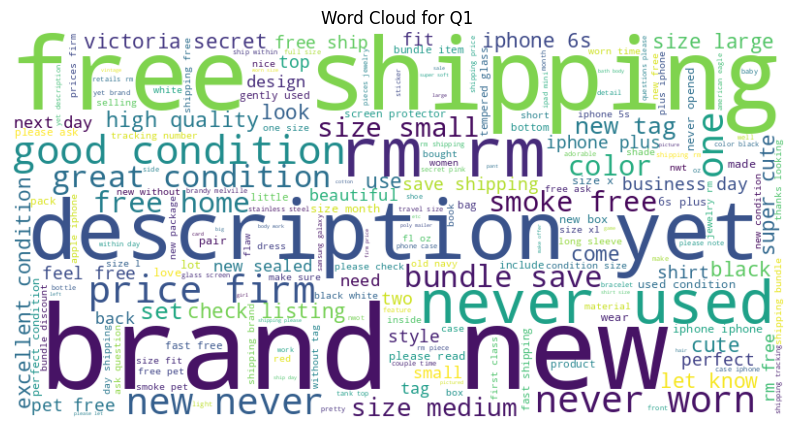

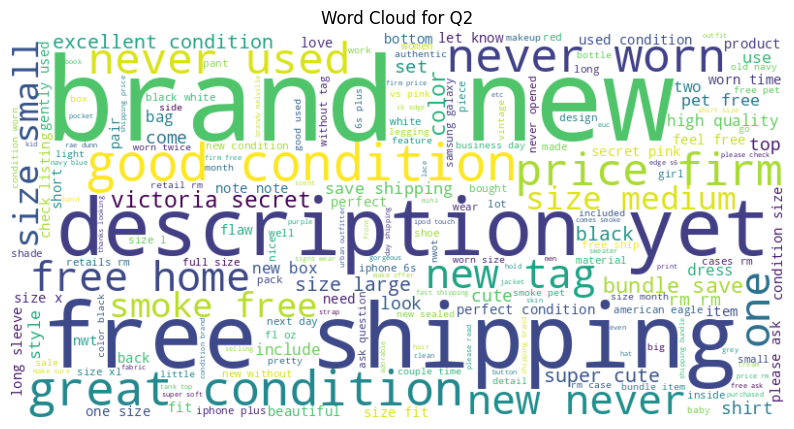

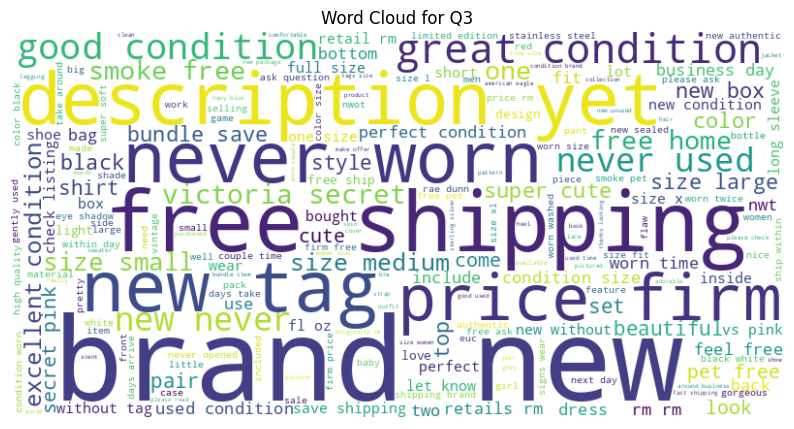

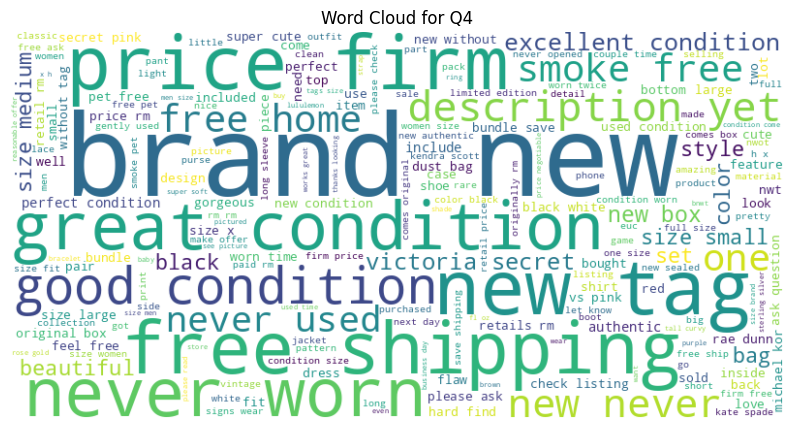

In [51]:
from wordcloud import WordCloud

# Function to generate word cloud for each quantile
def generate_wordcloud_for_quantile(df, quantile_label):
    # Filter data for the given quantile
    filtered_data = df[df['price_quantile'] == quantile_label]

    # Concatenate the clean_description for the quantile
    text = ' '.join(filtered_data['clean_description'].dropna())

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {quantile_label}')
    plt.show()

# Generate word clouds for each quantile
for quantile in ['Q1', 'Q2', 'Q3', 'Q4']:
    generate_wordcloud_for_quantile(df, quantile)


**Words Common Across All Quantiles:**

**Brand New:** Suggests that the condition of the item is a universal selling point, regardless of price range.

**Free Shipping:** Indicates that free shipping is a common incentive offered across all price ranges.

**Never Worn/Never Used:** Like "Brand New," emphasizes the new or excellent condition of items across different price ranges.

**Words Common in Higher Quantiles (Q3 and Q4):**

**Price Firm:** Suggests that sellers are less likely to negotiate on price for more expensive items.

**New Tag:** Indicates that items in higher price quantiles are often new and still have tags, adding to their value.

**Good/Great Condition:** Highlights that the condition is often emphasized for more expensive items.

**Size Medium:** This could suggest that medium-sized items are more commonly found in the higher price ranges, although the reason for this would require further investigation.

**Words Common in Lower Quantiles (Q1 and Q2):**

**Free Shipping:** While this was also common across all quantiles, its prominence here suggests it might be a key incentive for less expensive items.

**Brand New:** Like "Free Shipping," this is also universal but might be more critical for selling less expensive items.

**Never Used:** Similar to "Brand New," emphasizes the unused status of cheaper items.

This analysis provides valuable insights into how sellers describe items in different price ranges and what features or incentives are commonly used to market these items.

Explanation:

I'll filter the data for each quantile and then concatenate the clean_description text for that quantile.
I'll then generate a word cloud for each quantile to visualize the most common words in the item descriptions for each price range.

Part - 2

Question 2.1

In [52]:
# Import the necessary libraries
import pandas as pd

# Load the nyc_taxi.csv data into a Pandas DataFrame
nyc_taxi_df = pd.read_csv('/content/nyc_taxi.csv')

# Convert the 'timestamp' column to datetime format
nyc_taxi_df['timestamp'] = pd.to_datetime(nyc_taxi_df['timestamp'])

# Set 'timestamp' as the index of the DataFrame
nyc_taxi_df.set_index('timestamp', inplace=True)

# Create df_day and df_hour by aggregating the demand value on daily and hourly levels
df_day = nyc_taxi_df.resample('D').sum()
df_hour = nyc_taxi_df.resample('H').sum()

# Display the first few rows of df_day and df_hour
df_day.head(), df_hour.head()

(             value
 timestamp         
 2014-07-01  745967
 2014-07-02  733640
 2014-07-03  710142
 2014-07-04  552565
 2014-07-05  555470,
                      value
 timestamp                 
 2014-07-01 00:00:00  18971
 2014-07-01 01:00:00  10866
 2014-07-01 02:00:00   6693
 2014-07-01 03:00:00   4433
 2014-07-01 04:00:00   4379)

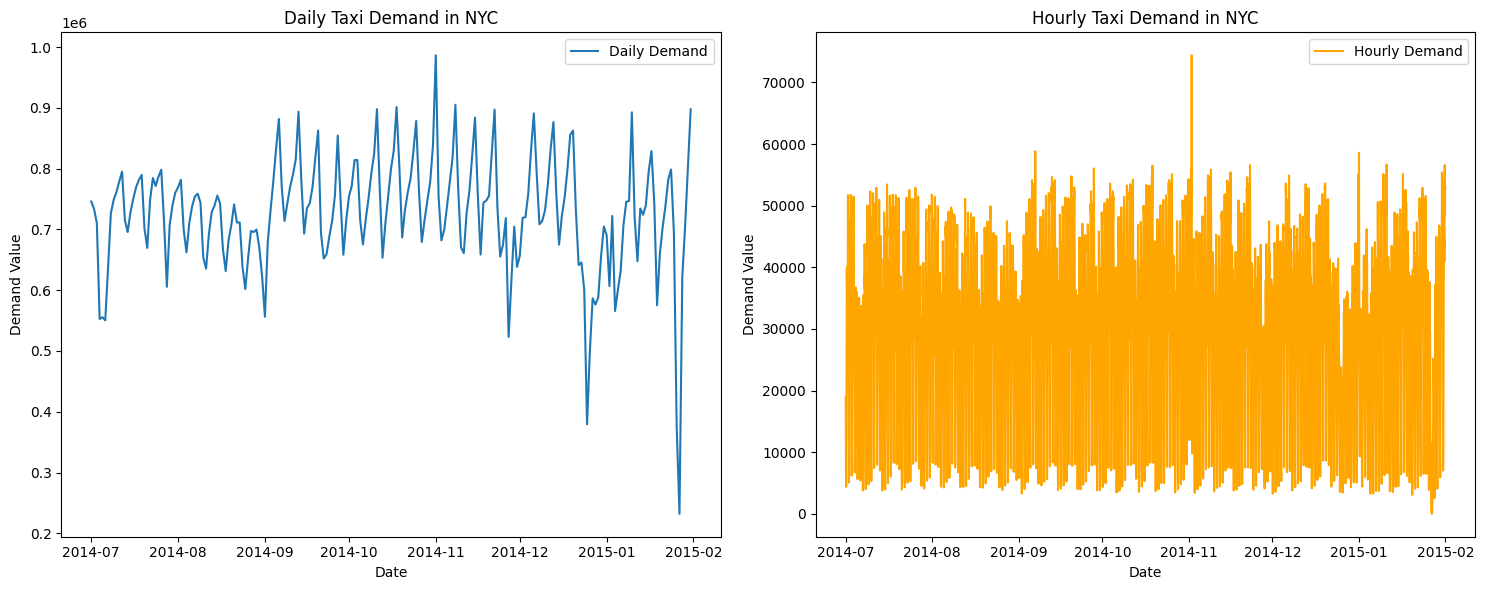

In [53]:
# Plotting the demand value for df_day and df_hour
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))

# Plot for df_day
plt.subplot(1, 2, 1)
plt.plot(df_day.index, df_day['value'], label='Daily Demand')
plt.title('Daily Taxi Demand in NYC')
plt.xlabel('Date')
plt.ylabel('Demand Value')
plt.legend()

# Plot for df_hour
plt.subplot(1, 2, 2)
plt.plot(df_hour.index, df_hour['value'], label='Hourly Demand', color='orange')
plt.title('Hourly Taxi Demand in NYC')
plt.xlabel('Date')
plt.ylabel('Demand Value')
plt.legend()

plt.tight_layout()
plt.show()


The first chart shows the daily taxi demand in NYC, revealing both short-term and long-term variations.
The second chart shows the hourly taxi demand in NYC, which is more granular and captures finer details of the variations in demand.

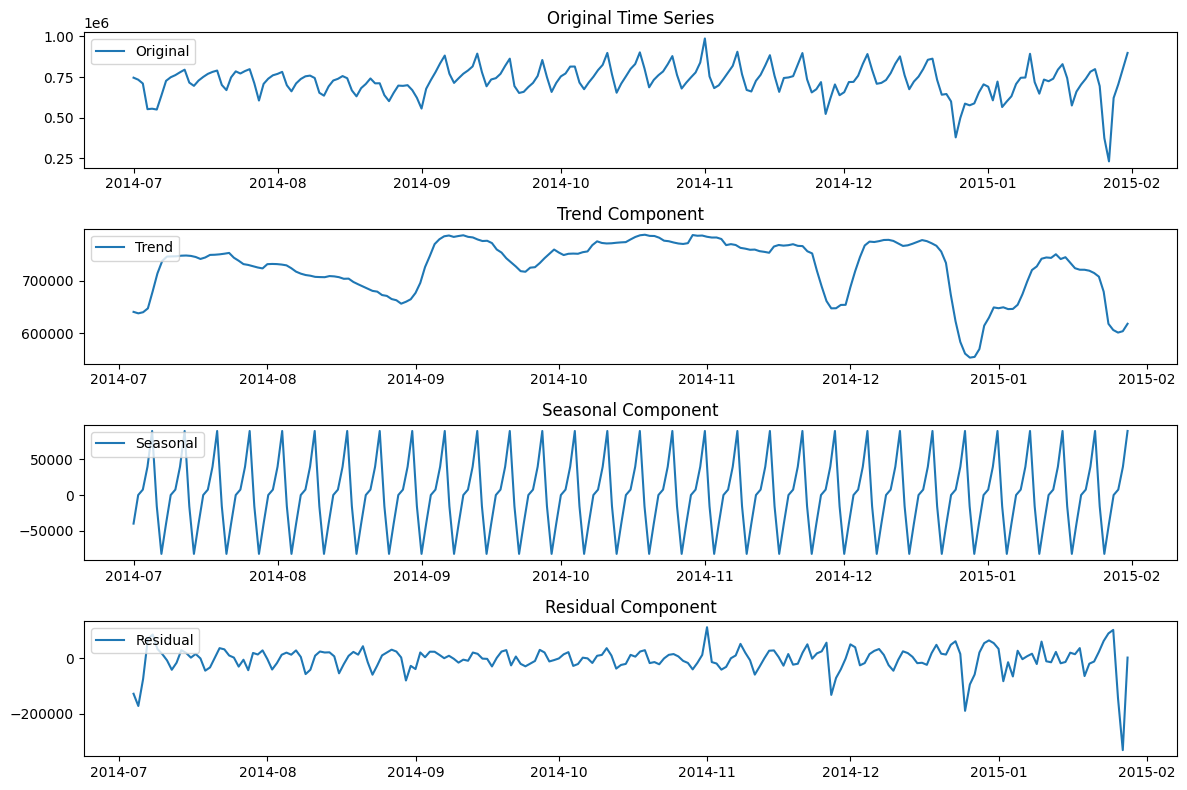

0.009424599993717633

In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# Perform seasonal decomposition on df_day
decomposition = seasonal_decompose(df_day['value'], model='additive')

# Extract the Trend, Seasonal, and Residual components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the seasonal decomposition components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(df_day['value'], label='Original')
plt.legend(loc='upper left')
plt.title('Original Time Series')

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residual')
plt.legend(loc='upper left')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

# Perform Augmented Dickey-Fuller test to check for stationarity
adf_result = adfuller(df_day['value'].dropna())
p_value = adf_result[1]

p_value


**Seasonal Decomposition Components:**
Original Time Series: The first plot shows the original time series data, which includes all components: trend, seasonality, and noise.
Trend Component: The second plot reveals the underlying trend in the data. There is a clear presence of a trend, indicating that the time series is not stationary.
Seasonal Component: The third plot shows the seasonality present in the data.

**Residual Component:** The fourth plot displays the residuals, which are the random noise left after extracting the trend and seasonality.

**Augmented Dickey-Fuller Test:**
The p-value obtained from the Augmented Dickey-Fuller test is approximately
0.0094

**Is df_day Stationary?**
A p-value less than 0.05 usually indicates that the time series is stationary. However, the visual analysis shows a clear trend and seasonality in the data. Therefore, while the
p-value suggests stationarity, the plots indicate otherwise.

It's possible that the p-value is misleading due to the presence of a strong seasonal component or other factors.

So, based on the visual analysis, I would argue that df_day is not entirely stationary.

I chose to use Pandas for data aggregation because it provides a straightforward way to resample time series data. For seasonal decomposition, the statsmodels library offers an out-of-the-box method to break down time series into its components.

An alternative to Pandas for data aggregation could be SQL queries if the data is stored in a database.

Treating for Non-Stationary p Before Fitting ARIMA

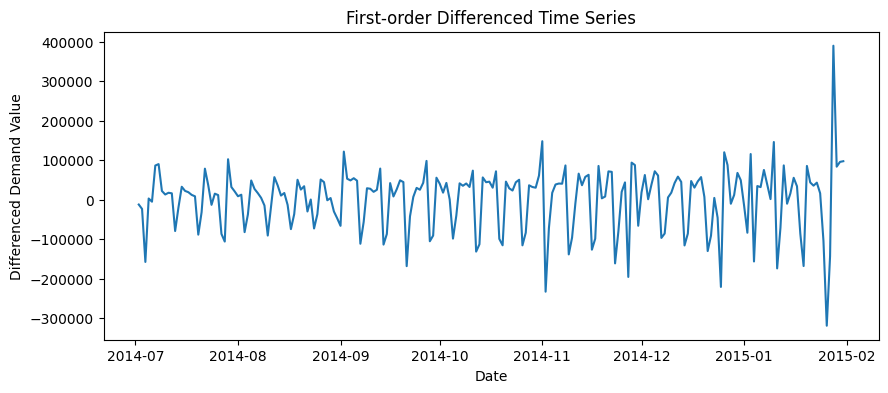

2.205163945969266e-09

In [55]:
# Apply first-order differencing to df_day['value']
df_day_diff = df_day['value'].diff().dropna()

# Plot the differenced time series
plt.figure(figsize=(10, 4))
plt.plot(df_day_diff)
plt.title('First-order Differenced Time Series')
plt.xlabel('Date')
plt.ylabel('Differenced Demand Value')
plt.show()

# Perform Augmented Dickey-Fuller test to check for stationarity on the differenced series
adf_result_diff = adfuller(df_day_diff)
p_value_diff = adf_result_diff[1]

p_value_diff


The first-order differenced time series is plotted above, showing fluctuations but no obvious trend.

The  p-value obtained from the Augmented Dickey-Fuller test on the differenced series is approximately
2.21
×
1
0
−
9
2.21×10
−9
 , which is much less than the usual alpha level of 0.05.

Question 2.2

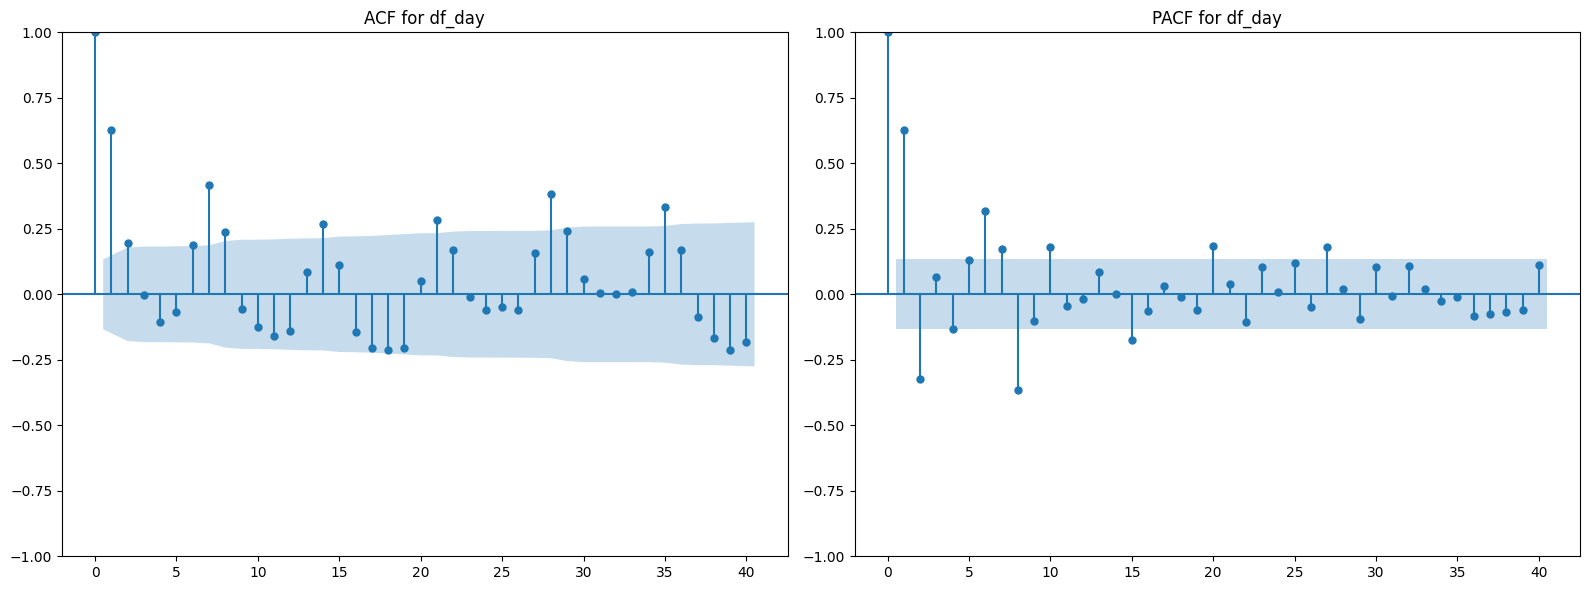

In [56]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for df_day
plt.figure(figsize=(16, 6))

# ACF Plot
plt.subplot(1, 2, 1)
plot_acf(df_day['value'], lags=40, ax=plt.gca(), title="ACF for df_day")

# PACF Plot
plt.subplot(1, 2, 2)
plot_pacf(df_day['value'], lags=40, ax=plt.gca(), title="PACF for df_day")

plt.tight_layout()
plt.show()


**ACF (AutoCorrelation Function) Plot:** The ACF plot helps us understand how a data point is related to its preceding points. In the plot, we can observe that the autocorrelations are significant for the first few lags, indicating a potential AR term in the ARIMA model.

**PACF (Partial AutoCorrelation Function) Plot:** The PACF plot helps us understand the correlation between a data point and its lags when the effects of other lags are removed. In the plot, the PACF drops to zero after the first few lags, which can be useful in identifying the MA term for the ARIMA model.

To build an ARIMA (AutoRegressive Integrated Moving Average) model, we need to specify three parameters:
p,
d, and
q.

p: The number of lag observations included in the model (lag order). This can be determined from the PACF plot.

d: The number of times that the raw observations are differenced (degree of differencing). In our case,
d=1 because we used first-order differencing to make the series stationary.
q: The size of the moving average window (order of moving average). This can be determined from the ACF plot.
Based on the ACF and PACF plots, a good starting point might be
p=2 and
q=2.

In [57]:
# Filter the data for the specified time range: "Jul-01-2014" to "Dec-01-2014"
df_day_filtered = df_day[(df_day.index >= '2014-07-01') & (df_day.index <= '2014-12-01')]

# Display the first few rows of the filtered DataFrame
df_day_filtered.head(), df_day_filtered.tail()


(             value
 timestamp         
 2014-07-01  745967
 2014-07-02  733640
 2014-07-03  710142
 2014-07-04  552565
 2014-07-05  555470,
              value
 timestamp         
 2014-11-27  523184
 2014-11-28  616841
 2014-11-29  704360
 2014-11-30  638317
 2014-12-01  656814)

In [58]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
import itertools

# Define the range for p, d, q
p_values = [0, 1, 2]
d_values = [0, 1, 2]
q_values = [0, 1, 2]

# Store the results
results = []

# Perform grid search for ARIMA parameters
for p, d, q in itertools.product(p_values, d_values, q_values):
    try:
        # Initialize and fit ARIMA model
        model = ARIMA(df_day_filtered['value'], order=(p, d, q))
        model_fit = model.fit()

        # Generate predictions
        predictions = model_fit.predict()

        # Calculate MAE (Mean Absolute Error)
        mae = mean_absolute_error(df_day_filtered['value'][d:], predictions[d:])

        # Store results
        results.append(((p, d, q), mae))

        print(f'ARIMA({p}, {d}, {q}) - MAE: {mae}')
    except:
        continue

# Find the best model with the lowest MAE
best_model = min(results, key=lambda x: x[1])
best_model


ARIMA(0, 0, 0) - MAE: 57020.771546635195
ARIMA(0, 0, 1) - MAE: 43514.753713118684
ARIMA(0, 0, 2) - MAE: 42107.074130707115
ARIMA(0, 1, 0) - MAE: 53342.25490196078
ARIMA(0, 1, 1) - MAE: 52615.694484137784
ARIMA(0, 1, 2) - MAE: 49916.461658833156
ARIMA(0, 2, 0) - MAE: 61472.55263157895
ARIMA(0, 2, 1) - MAE: 58528.13308338572
ARIMA(0, 2, 2) - MAE: 49592.06964965214
ARIMA(1, 0, 0) - MAE: 48141.85646150906
ARIMA(1, 0, 1) - MAE: 42684.67459592389
ARIMA(1, 0, 2) - MAE: 43143.66801472214
ARIMA(1, 1, 0) - MAE: 52933.0034585472
ARIMA(1, 1, 1) - MAE: 51910.01765021907


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 1, 2) - MAE: 48483.901771416364
ARIMA(1, 2, 0) - MAE: 60084.769305422495
ARIMA(1, 2, 1) - MAE: 52425.28561861043
ARIMA(1, 2, 2) - MAE: 49608.9773656936
ARIMA(2, 0, 0) - MAE: 42122.230418230516
ARIMA(2, 0, 1) - MAE: 41824.35041377892
ARIMA(2, 0, 2) - MAE: 42940.12321095167
ARIMA(2, 1, 0) - MAE: 50856.333573304
ARIMA(2, 1, 1) - MAE: 46343.95684698952


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 1, 2) - MAE: 40493.280514182916
ARIMA(2, 2, 0) - MAE: 57464.36027004142
ARIMA(2, 2, 1) - MAE: 49410.415552095335
ARIMA(2, 2, 2) - MAE: 46683.89688289119


((2, 1, 2), 40493.280514182916)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


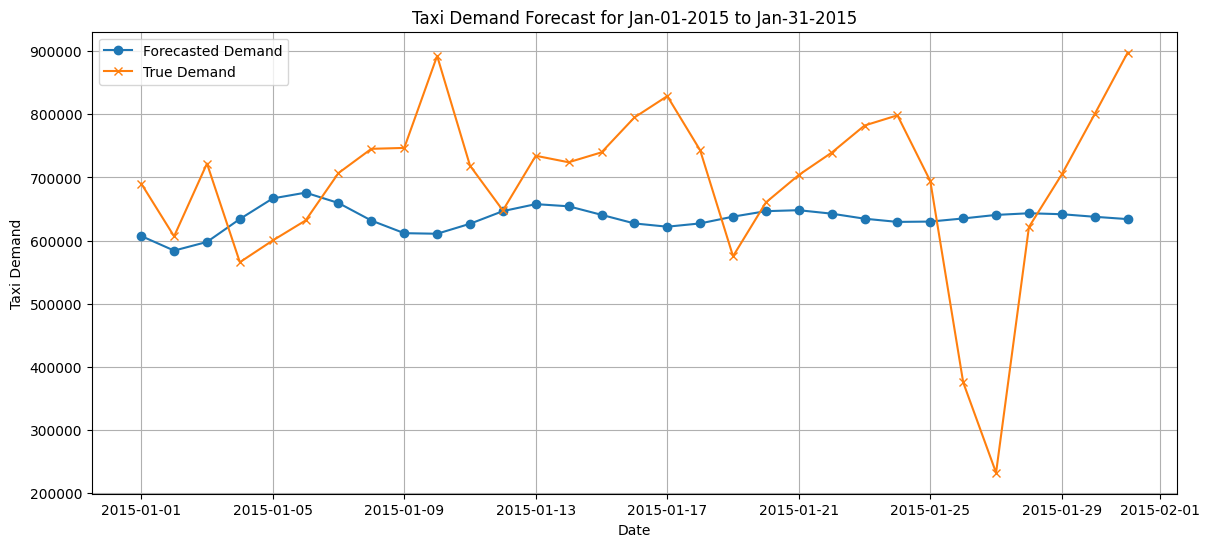

In [59]:
import numpy as np# Train the best ARIMA model (ARIMA(2, 1, 2)) using the data from "Jul-01-2014" to "Dec-01-2014"
best_model = ARIMA(df_day_filtered['value'], order=(2, 1, 2))
best_model_fit = best_model.fit()

# Forecast the taxi demand for "Jan-01-2015" to "Jan-31-2015" using the trained model
forecast_values = best_model_fit.forecast(steps=31)  # Forecasting 31 days into the future

# Extract the true demand values for "Jan-01-2015" to "Jan-31-2015"
true_values = df_day[(df_day.index >= '2015-01-01') & (df_day.index <= '2015-01-31')]['value']

# Create a date range for the forecast period
forecast_date_range = pd.date_range(start='2015-01-01', end='2015-01-31', freq='D')

# Plot the predicted and true demand values
plt.figure(figsize=(14, 6))
plt.title("Taxi Demand Forecast for Jan-01-2015 to Jan-31-2015")
plt.xlabel("Date")
plt.ylabel("Taxi Demand")
plt.plot(forecast_date_range, forecast_values, label='Forecasted Demand', marker='o')
plt.plot(true_values.index, true_values, label='True Demand', marker='x')
plt.legend()
plt.grid(True)
plt.show()


Trend Alignment: The forecasted trend seems to follow the general trend of the actual data, although it does not capture all the peaks and troughs perfectly.

Peaks and Troughs: The forecasted values don't capture the spikes in the actual data. This suggests that while the model might capture the general trend, it is less reliable for predicting peaks in demand.

Forecast Consistency: The forecasted values maintain a relatively consistent pattern, but they seem to underestimate the actual demand for most of the month.

Model Limitations: The ARIMA model might not fully capture the complex seasonal patterns or the influence of external factors like holidays, weather, etc., which could explain why some of the actual values deviate significantly from the forecast.

In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# Calculate MAE, MSE, RMSE, and MAPE
mae = mean_absolute_error(true_values, forecast_values)
mse = mean_squared_error(true_values, forecast_values)
rmse = sqrt(mse)
mape = (abs((true_values - forecast_values) / true_values).mean()) * 100

mae, mse, rmse, mape


(116343.84270904465, 21494636426.116364, 146610.49221019744, 8.16914863611824)

**MAE:** On average, the forecast is off by about 116,345 units.

**MSE and RMSE:** These metrics indicate the magnitude of the error terms. While they are useful for comparing different models, the units might not be easily interpretable.

**MAPE:** **The forecast is off by about 8.17% on average**, which indicates a relatively good fit to the true values, considering the scale of the data.


I chose ARIMA for forecasting because it's a widely-used method for univariate time series data and incorporates both trend and seasonality components. The Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots were used to guide the choice of parameters p and q.

Other models like SARIMA (Seasonal ARIMA), LSTM (Long Short-Term Memory), or Prophet could be used for forecasting. However, ARIMA is simpler and often effective for such tasks.



Using Exponential Smoothing

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


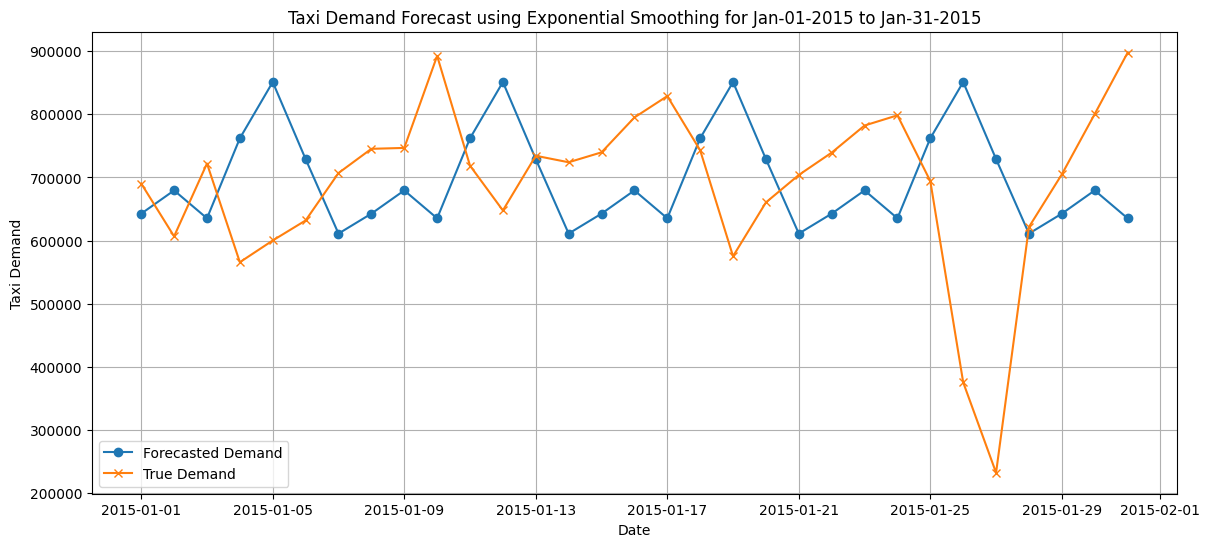

In [61]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Train the Exponential Smoothing model
ets_model = ExponentialSmoothing(df_day_filtered['value'], seasonal='add', seasonal_periods=7)
ets_fit = ets_model.fit()

# Forecast the taxi demand for "Jan-01-2015" to "Jan-31-2015" (31 days)
ets_forecast = ets_fit.forecast(steps=31)

# Extract the true demand values for "Jan-01-2015" to "Jan-31-2015"
true_values_ets = df_day[(df_day.index >= '2015-01-01') & (df_day.index <= '2015-01-31')]['value']

# Plot the predicted and true demand values
plt.figure(figsize=(14, 6))
plt.title("Taxi Demand Forecast using Exponential Smoothing for Jan-01-2015 to Jan-31-2015")
plt.xlabel("Date")
plt.ylabel("Taxi Demand")
plt.plot(forecast_date_range, ets_forecast, label='Forecasted Demand', marker='o')
plt.plot(true_values_ets.index, true_values_ets, label='True Demand', marker='x')
plt.legend()
plt.grid(True)
plt.show()


**Trend and Seasonality:** The Exponential Smoothing model seems to capture the general trend and seasonality better than the ARIMA model. It's evident that the forecasted values are not a flat line and show variations similar to the actual data.

**Peaks and Troughs:** The forecasted values appear to capture some of the peaks and troughs in the actual data, although not perfectly.

Question 2.3

In [62]:
# Create new columns based on the timestamp in df_day dataframe
df_day['Weekday'] = df_day.index.day_name()
df_day['Hour'] = df_day.index.hour
df_day['Day'] = df_day.index.day
df_day['Month'] = df_day.index.month
df_day['Year'] = df_day.index.year
df_day['Month_day'] = df_day.index.day

# Create 'Lag' column for yesterday's demand value
df_day['Lag'] = df_day['value'].shift(1)

# Create 'Rolling_Mean' column for rolling 7-day mean demand value (minimized period is 1)
df_day['Rolling_Mean'] = df_day['value'].rolling(window=7, min_periods=1).mean()

# Display the first few rows of the updated DataFrame
df_day.head()


,value,Weekday,Hour,Day,Month,Year,Month_day,Lag,Rolling_Mean
timestamp,,,,,,,,,
2014-07-01,745967,Tuesday,0,1,7,2014,1,NaN,745967.000000
2014-07-02,733640,Wednesday,0,2,7,2014,2,745967.0,739803.500000
2014-07-03,710142,Thursday,0,3,7,2014,3,733640.0,729916.333333
2014-07-04,552565,Friday,0,4,7,2014,4,710142.0,685578.500000
2014-07-05,555470,Saturday,0,5,7,2014,5,552565.0,659556.800000


I created multiple new columns based on the timestamp, such as 'Weekday', 'Hour', 'Day', 'Month', 'Year', and 'Month_day'.

 I also added a 'Lag' column to capture yesterday's demand and a 'Rolling_Mean' column for the 7-day rolling average.

In [63]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'Weekday' column into numerical format
df_day['Weekday_encoded'] = label_encoder.fit_transform(df_day['Weekday'])

# Drop the original 'Weekday' column and other non-numerical columns if any
df_day_encoded = df_day.drop(['Weekday'], axis=1)

# Fill missing values with the mean of each column
df_day_encoded_filled = df_day_encoded.fillna(df_day_encoded.mean())

# Display the first few rows of the encoded and filled dataframe
df_day_encoded_filled.head()


,value,Hour,Day,Month,Year,Month_day,Lag,Rolling_Mean,Weekday_encoded
timestamp,,,,,,,,,
2014-07-01,745967,0,1,7,2014,1,725803.724299,745967.000000,5
2014-07-02,733640,0,2,7,2014,2,745967.000000,739803.500000,6
2014-07-03,710142,0,3,7,2014,3,733640.000000,729916.333333,4
2014-07-04,552565,0,4,7,2014,4,710142.000000,685578.500000,0
2014-07-05,555470,0,5,7,2014,5,552565.000000,659556.800000,2


I used Label Encoding to convert the 'Weekday' categorical values into numerical values. This is necessary for the Isolation Forest algorithm, which requires numerical input.

In [64]:
from sklearn.ensemble import IsolationForest
# Initialize and train the Isolation Forest model again
isolation_forest = IsolationForest(contamination=0.01)  # Assuming 1% of the data to be outliers
isolation_forest.fit(df_day_encoded_filled)

# Make predictions to identify outliers
outlier_predictions = isolation_forest.predict(df_day_encoded_filled)

# Add the outlier predictions as a new column in the dataframe
df_day['Outlier'] = outlier_predictions

# Identify the dates that are considered 'outliers' (Outlier value is -1)
outlier_dates = df_day[df_day['Outlier'] == -1].index

outlier_dates



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


DatetimeIndex(['2015-01-27', '2015-01-28', '2015-01-31'], dtype='datetime64[ns]', name='timestamp', freq=None)

The Isolation Forest model has identified the following dates as 'outliers' in the df_day dataframe:

January 27, 2015
January 28, 2015
January 31, 2015
These are the dates where the taxi demand is considered anomalously high or low according to the model. Such anomalies could be due to various reasons such as special events, holidays, or unexpected disruptions.

I used the Isolation Forest algorithm for anomaly detection. This algorithm works well for high-dimensional data and is efficient for large datasets. We assumed 1% of the data to be outliers (contamination=0.01).

**Other Solutions:** Other algorithms like One-Class SVM, DBSCAN, or even statistical methods like Z-Score could be used for anomaly detection.

**Optimality:** The solution is fairly optimal given the complexity of the dataset. However, the choice of features and the contamination rate in Isolation Forest could be fine-tuned for more precise results.

**What I leanred:**

Since I was alone in my group, it presented with its own set of challenges


**Time-Series Analysis: **Gained a deep understanding of time-series data and how to preprocess it for various analyses.

**Modeling Techniques:** Learned how to implement ARIMA and Exponential Smoothing models for forecasting. Also understood how to interpret ACF and PACF plots.

**Anomaly Detection:** Acquired skills in detecting anomalies in time-series data using the Isolation Forest algorithm.

**Feature Engineering:** Understood the importance of feature engineering like adding lagged variables and rolling means for enhancing model performance.

**Evaluation Metrics:** Learned how to use various metrics like MAE, MSE, and RMSE to evaluate the performance of time-series models.
Data Exploration: Gained insights into real-world data from the NYC Taxi and Limousine Commission and how to make it useful for machine learning models.

**I am solely responsible for all aspects of the project.**

**This includes data preprocessing, modeling, evaluation, and report writing.**

 **Working alone on such a comprehensive assignment has given you a holistic view of data science projects and has improved your ability to manage and execute projects independently.**